In [14]:
import os, sys, math, random, argparse
import numpy as np
import matplotlib.pyplot as plt

path = os.getcwd()
random.seed(100)

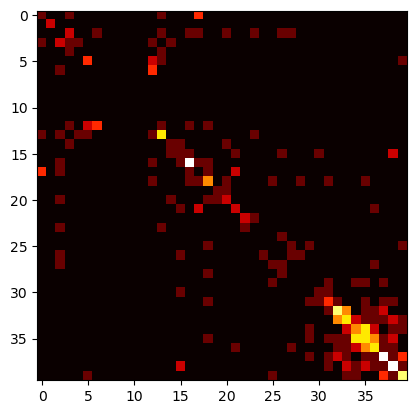

In [135]:
# HiCARN
z = np.load('/data/HiHiC-main/data_HiCARN/Train_and_Validation/train_ratio16.npz')
z.files
plt.imshow(z['data'][0,0], cmap='hot')

(16592, 1, 40, 40)

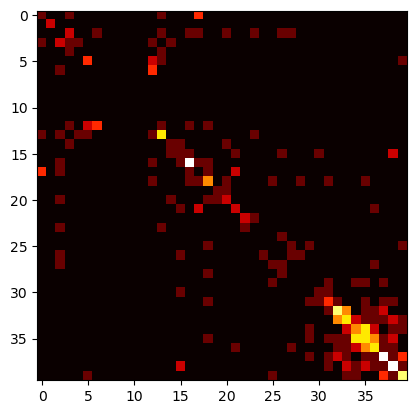

In [158]:
# DeepHiC
z = np.load("/data/HiHiC-main/data_DeepHiC/Train_and_Validation/train_ratio16.npz")
z.files # ['data', 'target', 'inds', 'compacts', 'size']
plt.imshow(z['data'][0,0], cmap='hot')
z['data'].shape

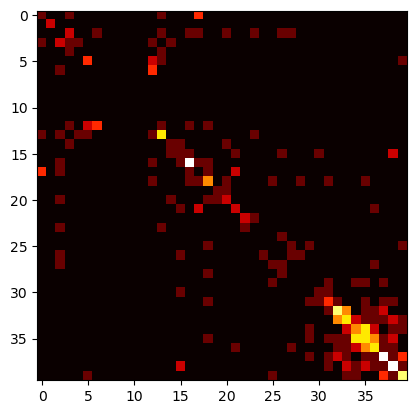

In [168]:
# DFHiC
z = np.load("/data/HiHiC-main/data_DFHiC/train_data_raw_ratio16.npz")
z.files # ['train_lr', 'train_hr', 'distance']
# plt.imshow(z['train_lr'][0,0], cmap='hot')
z['train_lr'].shape # (18572, 40, 40, 1)
plt.imshow(z['train_lr'].reshape(18572, 1, 40, 40)[0,0], cmap='hot')

(33197, 1, 40, 40)

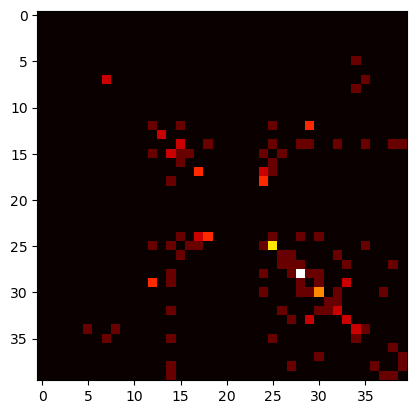

In [170]:
# HiCNN
z = np.load('/data/HiHiC-main/data_HiCNN/subMats_train_ratio16.npy')
plt.imshow(z[0,0], cmap='hot')
z.shape

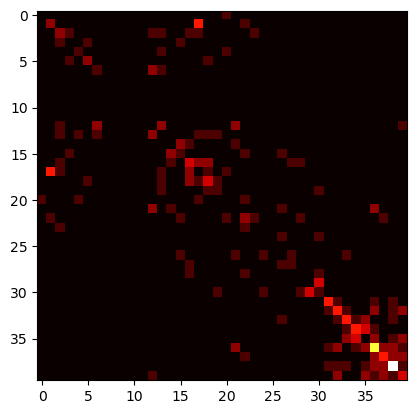

In [163]:
# hicplus
z = np.load('/data/HiHiC-main/data_hicplus/subMats_train_ratio16.npy')
plt.imshow(z[0,0], cmap='hot')

(35295, 40, 68)

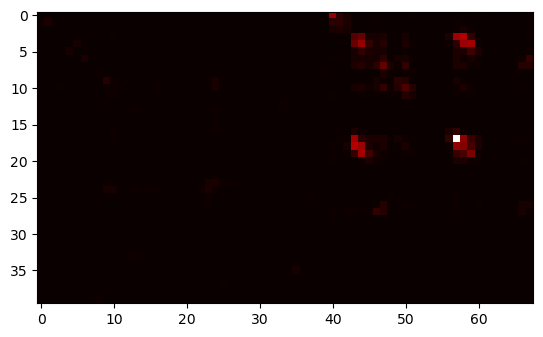

In [169]:
# SRHiC
z = np.load('/data/HiHiC-main/data_SRHiC/train/train_data_raw_ratio16.npy')
plt.imshow(z[0], cmap='hot')
z.shape

loss trend

In [171]:
np.load('/data/HiHiC-main/train_loss_hicplus.npy')

array([['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100',
        '110', '120', '130', '140', '150', '160', '170', '180', '190',
        '200', '210', '220', '230', '240', '250', '260', '270', '280',
        '290', '300', '310', '320', '330', '340', '350', '360', '370',
        '380', '390', '400', '410', '420', '430', '440', '450', '460',
        '470', '480', '490', '500'],
       ['0.00.03', '0.00.07', '0.00.11', '0.00.15', '0.00.19', '0.00.23',
        '0.00.28', '0.00.32', '0.00.36', '0.00.40', '0.00.44', '0.00.49',
        '0.00.53', '0.00.57', '0.01.01', '0.01.05', '0.01.09', '0.01.13',
        '0.01.18', '0.01.22', '0.01.26', '0.01.30', '0.01.34', '0.01.38',
        '0.01.42', '0.01.47', '0.01.51', '0.01.55', '0.01.59', '0.02.04',
        '0.02.08', '0.02.12', '0.02.16', '0.02.20', '0.02.24', '0.02.29',
        '0.02.33', '0.02.37', '0.02.41', '0.02.45', '0.02.49', '0.02.53',
        '0.02.58', '0.03.02', '0.03.06', '0.03.10', '0.03.14', '0.03.18',
        '0.03

In [103]:
plt.figure(figsize=(20,6))

for i, c, l in zip(['/data/HiHiC-main/train_loss_deepHiC.npy', 
              '/data/HiHiC-main/train_loss_DFHiC.npy', 
              '/data/HiHiC-main/train_loss_HiCARN1.npy', 
              '/data/HiHiC-main/train_loss_HiCNN2.npy', 
              '/data/HiHiC-main/train_loss_hicplus.npy', 
              '/data/HiHiC-main/train_loss_SRHiC.npy'],
             ['blue', 'orange', 'green', 'red', 'purple', 'pink'],
             ['deepHiC','DFHiC', 'HiCARN1', 'HiCNN2', 'hicplus', 'SRHiC']):
    i = np.load(i)
    x = i[0][:50].astype(np.int32)
    y = i[2][:50].astype(np.float32)
    plt.scatter(x,y, s=10)
    z = np.polyfit(x,y, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), color=c, label=l)
    for i, (xx, yy, time) in enumerate(zip(x, y, i[1][:50])):
        if i%8 ==0:
            plt.text(xx, yy, time.replace('.','h', 1).replace('.', 'm', 1)+'s')
plt.ylim([0, 1])
plt.legend()
plt.savefig('loss_trend.png')
# plt.show()

ValueError: Image size of 1601x462000054 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x600 with 1 Axes>

In [ ]:
# 인자 받기
parser = argparse.ArgumentParser(description='Train deep learning model for enhancing Hi-C contact map', add_help=True)
req_args = parser.add_argument_group('Required Arguments')
req_args.add_argument('-m', dest='model', required=True, choices=['DeepHiC', 'HiCNN2', 'DFHiC', 'hicplus', 'SRHiC', 'HiCARN1', 'HiCARN2'],
                      help="REQUIRED: Model name you'd like to use (One of DeepHiC, HiCNN2, SRHiC, DFHiC, HiCARN1, HiCARN2 and hicplus) - (example) DFHiC")
req_args.add_argument('-t', dest='train_data_dir', required=True,
                      help='REQUIRED: Hi-C data directory containig cropped matrix files (Directory of Hi-C matrix for training input) - (example) /HiHiC/data_DFHiC/train')
req_args.add_argument('-v', dest='valid_data_dir', required=True,
                      help='REQUIRED: Hi-C data directory containig cropped matrix files (Directory of Hi-C matrix for validation input) - (example) /HiHiC/data_DFHiC/valid')
req_args.add_argument('-o', dest='output_model_dir', required=True,
                      help='REQUIRED: Directory to save model weights (Directory for saving trained model) - (example) /HiHiC/chekpoints_DFHiC')
req_args.add_argument('-e', dest='epoch', required=True,
                      help='REQUIRED: Number of training epoch - (example) 500')
req_args.add_argument('-g', dest='gpu_id', required=True,
                      help='REQUIRED: GPU ID for training - (example) 0')
req_args.add_argument('-l', dest='loss_log_dir', required=True,
                      help='REQUIRED: Directory to save training loss and time spent - (example) HiHiC')

args = parser.parse_args()
model = args.model
train_data_dir = args.train_data_dir 
valid_data_dir = args.valid_data_dir 
output_model_dir = args.output_model_dir
epoch = args.epoch
gpu_id = args.gpu_id
loss_log_dir = args.loss_log_dir

In [ ]:
# weight 저장
torch.save(model.state_dict(), PATH)

# weight 불러오기
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

In [ ]:
MSE = np.square(np.subtract(x, y)).mean()

In [ ]:
def signaltonoise(Arr, axis=0, ddof=0):
    Arr = np.asanyarray(Arr)
    me = Arr.mean(axis)
    sd = Arr.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)

Arr=[[20, 4, 7, 1, 34], [50, 12, 15, 34, 5]]
print(signaltonoise(Arr,axis=0,ddof=0))

In [ ]:
## version1
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
     original = cv2.imread("original_image.png") 
     compressed = cv2.imread("compressed_image.png", 1) 
     value = PSNR(original, compressed) 
     print(f"PSNR value is {value} dB") 
     
     
## version2     
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [ ]:
import math
import numpy as np
import cv2

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')